In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, balanced_accuracy_score, f1_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import lightgbm


In [2]:
features = pd.read_csv('/Users/seibi/projects/ms_driams/cipro_x.csv')
outcome = pd.read_csv('/Users/seibi/projects/ms_driams/cipro_y.csv')

In [ ]:
# No SMOTE, No Feature Selection
print("No SMOTE, No Feature Selection...")
regular_roc = []
regular_acc = []
regular_fs_f1 = []
for i in np.arange(1,10,1):
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = i)
    fold_count = 1
    for train_index, test_index in skf.split(features, outcome):
        print(f"Evaluating Fold {fold_count}/5...")
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]
        reg_lightgbm = lightgbm.LGBMClassifier(objective="binary", seed=42, boosting_type='gbdt', learning_rate=0.01, n_estimators=25, min_child_samples=1)
        _ = reg_lightgbm.fit(X_train, y_train)#, eval_set = (features_val, outcome_val), callbacks = [lightgbm.early_stopping(50)])
        #y_pred = reg_lightgbm.predict(X_test)
        y_prob = reg_lightgbm.predict_proba(X_test)[:,1]
        regular_roc.append(roc_auc_score(y_test, y_prob))
        #regular_acc.append(accuracy_score(y_test, y_pred))
        #regular_fs_f1.append(f1_score(y_test, y_pred))
        # print("ROC:", roc_auc_score(y_test, y_pred))
        # print("ACC:", accuracy_score(y_test, y_pred))
        # print("F1:", f1_score(y_test, y_pred))
        fold_count += 1

(array([1., 1., 0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 1., 0., 2.,
        1., 1., 0., 1., 0., 1., 1., 3., 0., 2., 0., 0., 4., 2., 0., 2., 1.,
        0., 0., 4., 3., 0., 0., 0., 2., 1., 1., 0., 0., 0., 1., 0., 2.]),
 array([0.70957251, 0.71165816, 0.71374381, 0.71582946, 0.7179151 ,
        0.72000075, 0.7220864 , 0.72417205, 0.72625769, 0.72834334,
        0.73042899, 0.73251464, 0.73460028, 0.73668593, 0.73877158,
        0.74085723, 0.74294288, 0.74502852, 0.74711417, 0.74919982,
        0.75128547, 0.75337111, 0.75545676, 0.75754241, 0.75962806,
        0.7617137 , 0.76379935, 0.765885  , 0.76797065, 0.77005629,
        0.77214194, 0.77422759, 0.77631324, 0.77839888, 0.78048453,
        0.78257018, 0.78465583, 0.78674148, 0.78882712, 0.79091277,
        0.79299842, 0.79508407, 0.79716971, 0.79925536, 0.80134101,
        0.80342666, 0.8055123 , 0.80759795, 0.8096836 , 0.81176925,
        0.81385489]),
 <BarContainer object of 50 artists>)

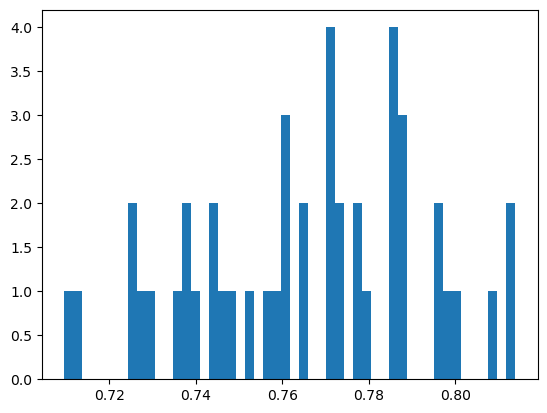

In [11]:
plt.hist(regular_roc, bins =50)

In [32]:
import numpy as np
import pandas as pd
df = np.array([[0.73, 0.77, 0.74, 0.79, 0.75, 0.77],
    [0.715,0.745, 0.705, 0.715, 0.67, 0.71],
    [0.55, 0.66, 0.60, 0.71, 0.63, 0.76],
    [0.70, 0.71, 0.61, 0.71, 0.62, 0.77],
    [0.72, 0.73, 0.51, 0.64, 0.67, 0.71],
    [0.74, 0.76, 0.61, 0.67, 0.75, 0.78],
    [0.77, 0.73, 0.75, 0.74, 0.71, 0.75],
    [0.56, 0.61, 0.55, 0.56, 0.50, 0.61],
    [0.84, 0.81, 0.805, 0.82, 0.76, 0.82]],dtype='f')

base = df[:, 0].reshape(-1, 1)
df = (df - base) / base

print(df)

[[ 0.          0.05479447  0.01369862  0.08219178  0.02739723  0.05479447]
 [ 0.          0.04195809 -0.013986    0.         -0.06293701 -0.006993  ]
 [ 0.          0.20000002  0.09090911  0.29090902  0.14545451  0.38181815]
 [ 0.          0.0142857  -0.12857139  0.0142857  -0.11428569  0.09999999]
 [ 0.          0.01388888 -0.29166672 -0.11111116 -0.06944446 -0.01388896]
 [ 0.          0.027027   -0.17567566 -0.09459458  0.0135135   0.054054  ]
 [ 0.         -0.051948   -0.025974   -0.038961   -0.07792208 -0.025974  ]
 [ 0.          0.08928574 -0.01785713  0.         -0.10714286  0.08928574]
 [ 0.         -0.03571425 -0.04166663 -0.0238095  -0.09523807 -0.0238095 ]]


In [58]:
data = pd.DataFrame(df,
columns = ['Base','SMOTE','FS','SMOTE\n+FS','CNN','CNN\n+SMOTE'],
index = ['Ecoli-ceftriaxone','Ecoli-ciproproxacin','Ecoli-cefepime','Kpneu-cefepime',"Kpneu-ciprofloxacin",'K-ceftriaxone','Saureus-ciprofloxacine','Saureus-fusidic',"Saureus-oxacillin"])

data

,Base,SMOTE,FS,SMOTE\n+FS,CNN,CNN\n+SMOTE
Ecoli-ceftriaxone,0.0,0.054794,0.013699,0.082192,0.027397,0.054794
Ecoli-ciproproxacin,0.0,0.041958,-0.013986,0.000000,-0.062937,-0.006993
Ecoli-cefepime,0.0,0.200000,0.090909,0.290909,0.145455,0.381818
Kpneu-cefepime,0.0,0.014286,-0.128571,0.014286,-0.114286,0.100000
Kpneu-ciprofloxacin,0.0,0.013889,-0.291667,-0.111111,-0.069444,-0.013889
K-ceftriaxone,0.0,0.027027,-0.175676,-0.094595,0.013514,0.054054
Saureus-ciprofloxacine,0.0,-0.051948,-0.025974,-0.038961,-0.077922,-0.025974
Saureus-fusidic,0.0,0.089286,-0.017857,0.000000,-0.107143,0.089286
Saureus-oxacillin,0.0,-0.035714,-0.041667,-0.023810,-0.095238,-0.023810


In [18]:
# normalize by row
t_data = data.T
max_ = t_data.max()
max_
t_data /= max_
t_data
# return
t_t_data = t_data.T
t_t_data['drug'] = ['ceft','cipro','cefe','cefe','cipro','ceft','cipro','fus','oxa']
t_t_data['patho']=['ecoli','ecoli','ecoli','K','K','K',"S",'S','S']
t_t_data

,Base,SMOTE,FS,SMOTE+FS,CNN,CNN+SMOTE,drug,patho
Ecoli-ceftriaxone,0.0,0.4,0.8,0.2,1.0,0.6,ceft,ecoli
Ecoli-ciproproxacin,0.8,0.4,1.0,0.0,0.6,0.2,cipro,ecoli
Ecoli-cefepime,0.0,0.4,0.8,0.2,0.6,1.0,cefe,ecoli
Kpneu-cefepime,0.4,0.8,0.0,0.2,0.6,1.0,cefe,K
Kpneu-ciprofloxacin,0.4,0.6,0.8,1.0,0.0,0.2,cipro,K
K-ceftriaxone,0.4,0.6,0.0,0.8,0.2,1.0,ceft,K
Saureus-ciprofloxacine,0.8,0.2,0.6,0.4,1.0,0.0,cipro,S
Saureus-fusidic,0.8,0.4,0.0,0.6,0.2,1.0,fus,S
Saureus-oxacillin,0.8,0.4,0.2,0.6,1.0,0.0,oxa,S


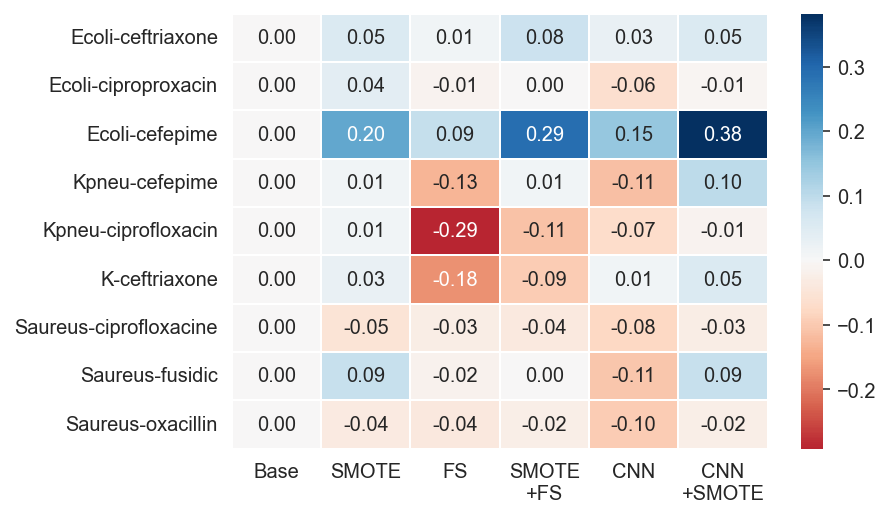

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare a vector of color mapped to the 'cyl' column
#colored_column = t_t_data['patho']
#my_palette = dict(zip(colored_column.unique(), ['red','green','blue','orange','purple']))
#row_colors = colored_column.map(my_palette)
sns.heatmap(data, linewidths=1, cmap="RdBu", annot=True, fmt=".2f", center=0) #, row_colors=row_colors,)
plt.savefig("fig_heatmap.png", dpi=300, bbox_inches='tight')

In [35]:
values= pd.DataFrame(t_t_data.median(axis=0), columns=["Median"])
values


/var/folders/kq/0btgds9d0gn_knn21km5_b980000gn/T/ipykernel_55072/2958176124.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  values= pd.DataFrame(t_t_data.median(axis=0), columns=["Median"])


,Median
Base,0.4
SMOTE,0.4
FS,0.6
SMOTE+FS,0.4
CNN,0.6
CNN+SMOTE,0.6


<AxesSubplot:ylabel='Median'>

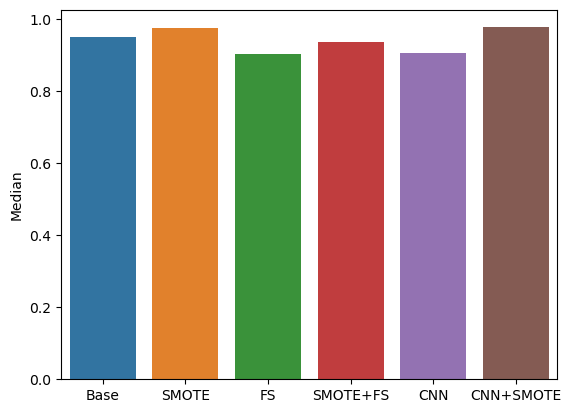

In [98]:

sns.barplot(data=values, x= values.index, y= values['Median'])